In [32]:
import sympy as sp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import sys
sys.path.append('../')
import newcomb_g
reload(newcomb_g)
import equil_solver as es

from scipy.interpolate import splev

# look at $f$ and $g$ when $B_{\theta}$ is constant.

$f =\frac{r(rkB_z - m B_\theta)^2}{k^2r^2+m^2}$


$g = \frac{(krB_{z} - m B_{\theta})**2}{r}$

In [33]:
k_bar = 1.0
lambda_bar = 5.0

params = {'k': k_bar,
          'm': 0,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.99,
                  'transition_width_norm': 0.0033,
                  'skin_width_norm': 0.0034}

profile = es.UnitlessSmoothedCoreSkin(lambda_bar=lambda_bar, k_bar=k_bar, epsilon=1.0, 
                                      core_radius_norm=0.99, transition_width_norm=0.0033, 
                                      skin_width_norm=0.0034)

splines = profile.get_tck_splines()

r = np.linspace(0, 1, 200)

b_z = splev(r, splines['b_z'])
b_z_prime = 0
b_theta = splev(r, splines['b_theta'])
b_theta_prime = splev(r, splines['b_theta_prime'])
p_prime = splev(r, splines['p_prime'])
q = splev(r, splines['q'])
q_prime = splev(r, splines['q_prime'])
beta_0 = profile.beta_0()

g_17 = newcomb_g.newcomb_g_17(r, k_bar, 0, b_z, b_z_prime, b_theta, b_theta_prime,
                       p_prime, q, q_prime)
g_18 = newcomb_g.newcomb_g_18_dimless_wo_q(r, k_bar, 0, b_z, b_theta, p_prime, beta_0)

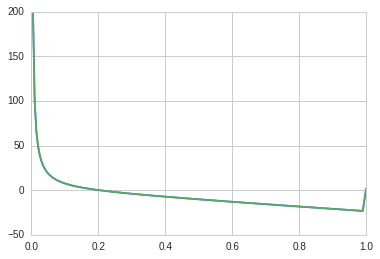

In [38]:
plt.plot(r, g_17)
plt.plot(r, g_18)
plt.show()

In [11]:
splines.keys()

[u'b_z_prime',
 u'b_theta',
 u'b_theta_prime',
 u'b_z',
 u'q_prime',
 u'q',
 u'pressure',
 u'beta',
 u'rho',
 u'j_z',
 u'b_theta_prime_prime',
 u'p_prime']

In [14]:
profile.beta_0()

12.626024721937652

In [18]:
profile.beta(0)

12.626024721937652